# Anaïs DUC-MARTIN

# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [3]:
dataframe.head()

,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


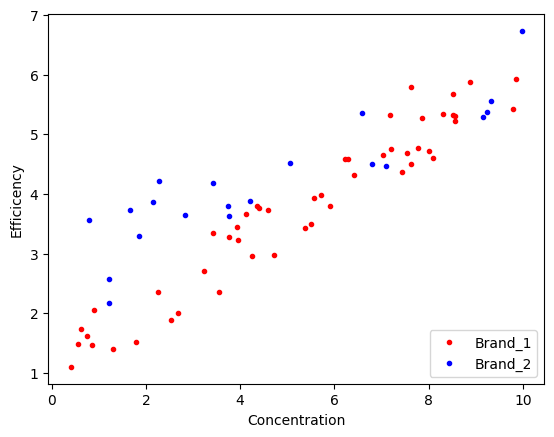

In [4]:
fig = plt.figure()
plt.plot(dataframe[dataframe['Brand']=='Brand_1']['Concentration'], dataframe[dataframe['Brand']=='Brand_1']['Efficiency'], 'r.')
plt.plot(dataframe[dataframe['Brand']=='Brand_2']['Concentration'], dataframe[dataframe['Brand']=='Brand_2']['Efficiency'], 'b.')
plt.xlabel('Concentration')
plt.ylabel('Efficicency')
plt.legend(('Brand_1', 'Brand_2'), loc='lower right')
plt.show()

- Plus la concentration du produit est élevée, plus le rendement semble augmenter.

- Il semble avoir une différence entre les 2 marques, car la pente des nuages de points n'est pas la même pour les 2 marques.

- L'effet semble dépendre de la concentration du produit car pour une marque fixée le rendement augmente avec la concentration du produit.

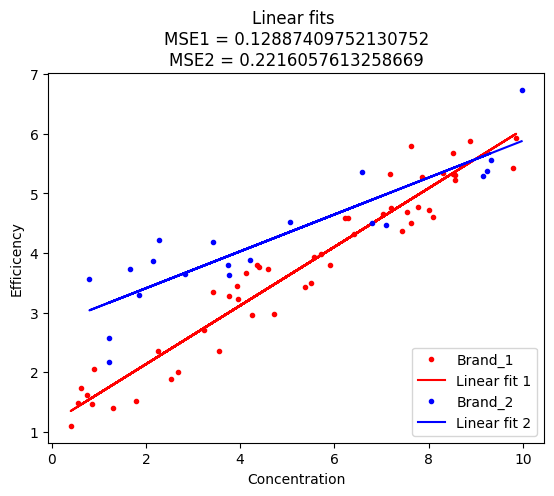

y=ax+b, avec:
      a_brand1=0.4914818032677403
      b_brand1=1.1514211119371502
y=ax+b, avec:
      a_brand2=0.3090175959782139
      b_brand2=2.789553606142352


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# BRAND 1
X1 = np.array(dataframe[dataframe['Brand']=='Brand_1']['Concentration']).reshape(-1,1)
y1 = np.array(dataframe[dataframe['Brand']=='Brand_1']['Efficiency'])
lr_1 = LinearRegression()
lr_1.fit(X1, y1)

# BRAND 2
X2 = np.array(dataframe[dataframe['Brand']=='Brand_2']['Concentration']).reshape(-1,1)
y2 = np.array(dataframe[dataframe['Brand']=='Brand_2']['Efficiency'])
lr_2 = LinearRegression()
lr_2.fit(X2, y2)

fig = plt.figure()
plt.plot(X1, y1, 'r.')
plt.plot(X1, lr_1.predict(X1), 'r-')
plt.plot(X2, y2, 'b.')
plt.plot(X2, lr_2.predict(X2), 'b-')
plt.xlabel('Concentration')
plt.ylabel('Efficicency')
plt.legend(('Brand_1', 'Linear fit 1', 'Brand_2', 'Linear fit 2'), loc='lower right')
plt.title(f"Linear fits \nMSE1 = {mean_squared_error(y_true=y1, y_pred=lr_1.predict(X1))}\nMSE2 = {mean_squared_error(y_true=y2, y_pred=lr_2.predict(X2))}")
plt.show()
print(f"""y=ax+b, avec:
      a_brand1={lr_1.coef_[0]}
      b_brand1={lr_1.intercept_}""")
print(f"""y=ax+b, avec:
      a_brand2={lr_2.coef_[0]}
      b_brand2={lr_2.intercept_}""")

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

On note $x_{B,i}$ et $y_{B,i}$ la concentration et le rendement pour l'observation $i$ appartenant au groupe $B \in{\{1,2\}}$.

On suppose que : $y_{B,i} = a_{B}x_{B,i} + b_{B} + \epsilon_{B,i}$

et que : $\epsilon_{B,i} \sim N(0,\sigma^2) $

Test statistique :

(ii) -> 2 tests sur les $a_{B}$ pour vérifier que y dépend de x : Rejeter les hypothèses $a_1=0$ et $a_2=0$

(i) -> 1 test sur $a_{1}=a_{2}$ pour vérifier que le produit a un effet différent sur les 2 groupes (il faut conclure qu'on peut rejeter l'hypothèse $a_{1}=a_{2}$)


CF slides 13 du pdf 4


TEst sur les variances sur les erreurs de prédictions avec 2 modèles : est-ce que la variance des erreurs des 2 modèles sont les mêmes ?

In [ ]:
# Modèle incomplet (Ho : a1=a2)
X = np.array(dataframe['Concentration']).reshape(-1,1)
y = np.array(dataframe['Efficiency'])

lr = LinearRegression()
lr.fit(X, y)

y_hat = lr.predict(X)

SSE_incomplet = np.sum((y - y_hat)**2)

# Modèle complet (H1 : a1!=a2)
SSE_complet = np.sum((y1 - lr_1.predict(X1))**2) + np.sum((y2 - lr_2.predict(X2))**2)

In [ ]:
F = SSE_incomplet/SSE_complet
F

np.float64(2.1116954908942076)

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [42]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


#X=...

#Y=...

#TODO



### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.



### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?

